In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/alexa .tsv',sep="\t")

In [ ]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [ ]:
positive = df[df['feedback']==1]

In [ ]:
negative= df[df['feedback']==0]

<Axes: xlabel='feedback', ylabel='count'>

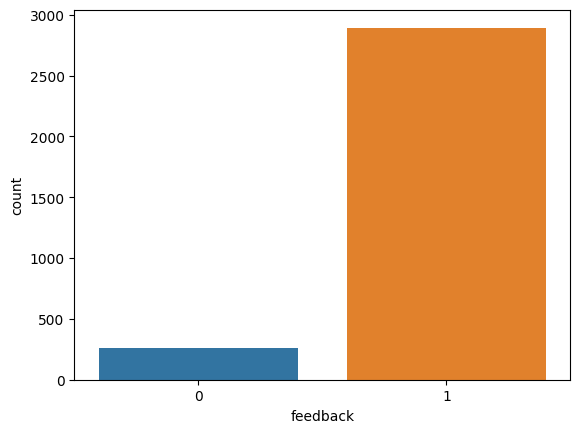

In [ ]:
sns.countplot(x='feedback',data=df)

<Axes: xlabel='rating', ylabel='count'>

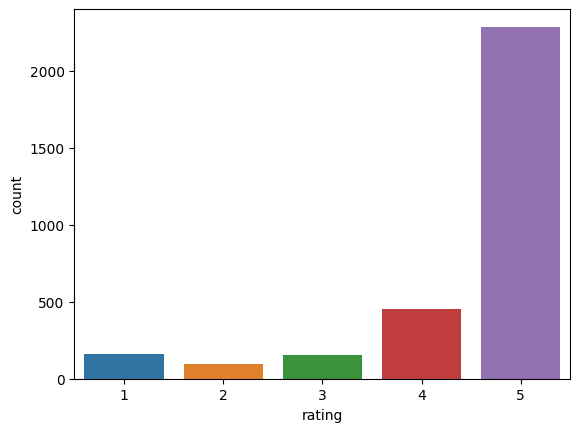

In [ ]:
sns.countplot(x = 'rating', data = df)

<Axes: >

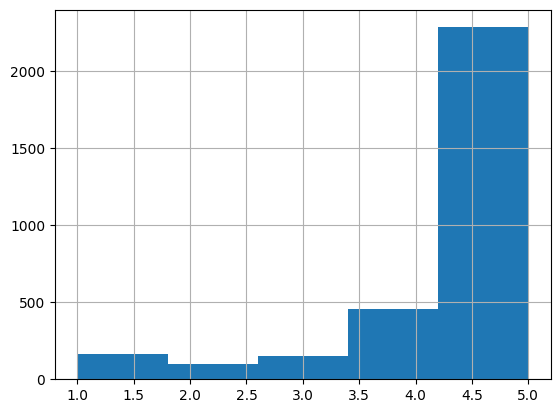

In [ ]:
df['rating'].hist(bins = 5)

<Axes: xlabel='variation', ylabel='rating'>

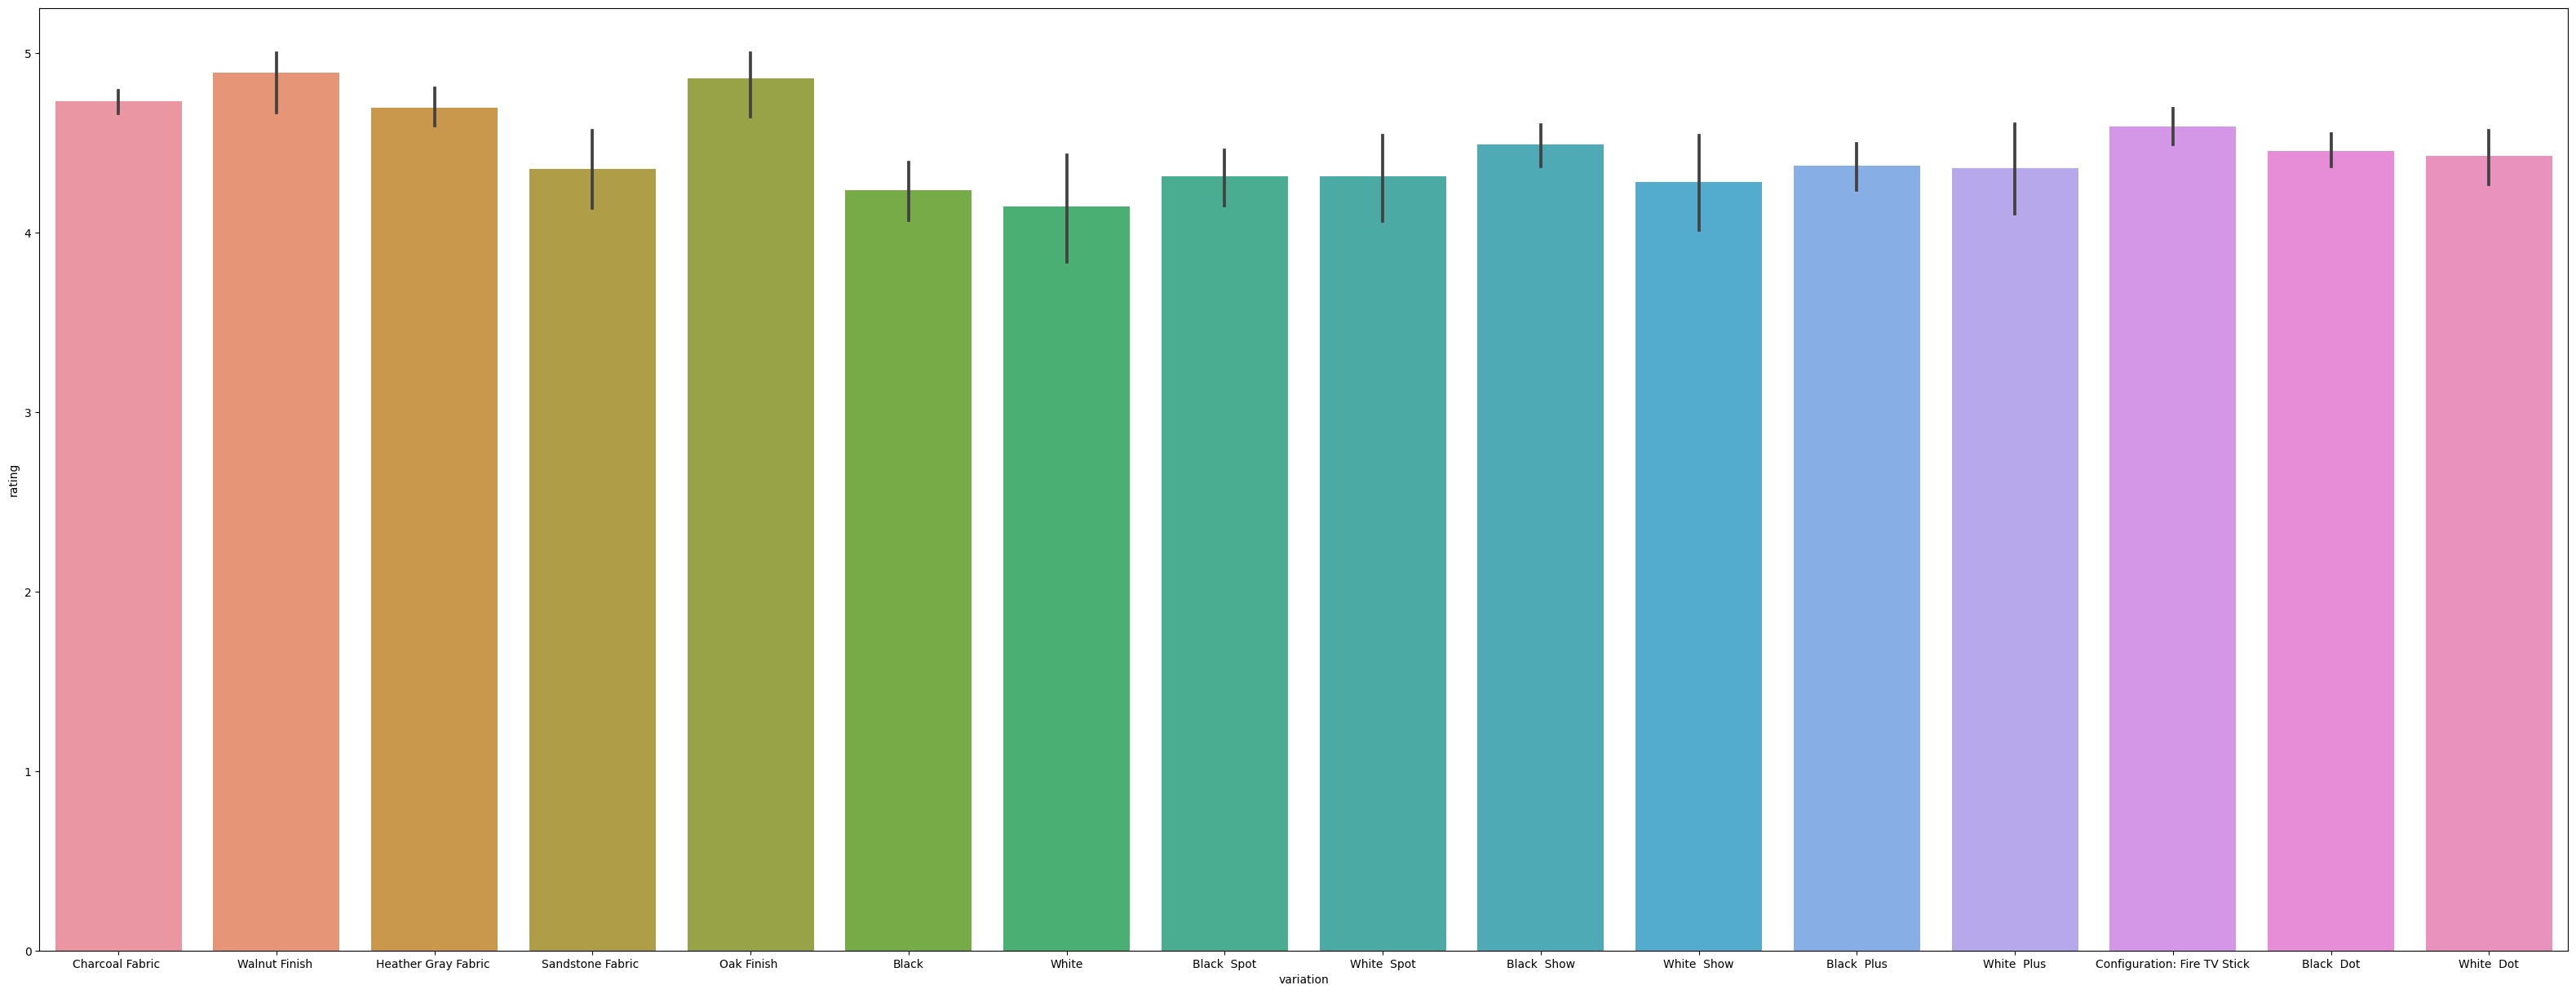

In [ ]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df,)

<Axes: xlabel='rating'>

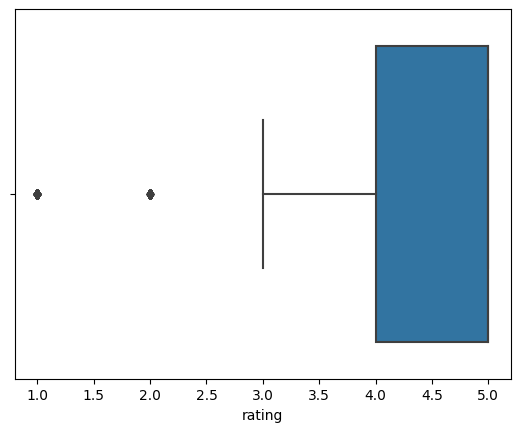

In [ ]:
sns.boxplot(x='rating',data=df)

In [ ]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [ ]:
# Let's drop the date
df = df.drop(['date', 'rating'],axis=1)


In [ ]:
df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
variation_dummies = pd.get_dummies(df['variation'])

In [ ]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# first let's drop the column
df.drop(['variation'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [ ]:
# Now let's add the encoded column again
df= pd.concat([df, variation_dummies], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   verified_reviews              3150 non-null   object
 1   feedback                      3150 non-null   int64 
 2   Black                         3150 non-null   uint8 
 3   Black  Dot                    3150 non-null   uint8 
 4   Black  Plus                   3150 non-null   uint8 
 5   Black  Show                   3150 non-null   uint8 
 6   Black  Spot                   3150 non-null   uint8 
 7   Charcoal Fabric               3150 non-null   uint8 
 8   Configuration: Fire TV Stick  3150 non-null   uint8 
 9   Heather Gray Fabric           3150 non-null   uint8 
 10  Oak Finish                    3150 non-null   uint8 
 11  Sandstone Fabric              3150 non-null   uint8 
 12  Walnut Finish                 3150 non-null   uint8 
 13  White             

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the Deep Learning Class','For Cloud Destination.','Rathinam Technical Campus.','Here We Go']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
X


<4x15 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.get_feature_names_out())

['campus' 'class' 'cloud' 'deep' 'destination' 'for' 'go' 'here' 'is'
 'learning' 'rathinam' 'technical' 'the' 'this' 'we']


In [ ]:
print(X.toarray())

[[0 1 0 1 0 0 0 0 1 1 0 0 1 1 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])


In [ ]:
alexa_countvectorizer.shape

(3150, 4044)

In [ ]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '07' ... 'zzzz' 'zzzzzzz' 'útil']


In [ ]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# first let's drop the column
df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())


In [ ]:
# Now let's concatenate them together
df_alexa = pd.concat([df, reviews], axis=1)
df_alexa

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's drop the target label coloumns
X = df_alexa.drop(['feedback'],axis=1)
X

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df_alexa['feedback']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [ ]:
X_train.shape

(2520, 4060)

In [ ]:
X_test.shape

(630, 4060)

In [ ]:
y_train.shape

(2520,)

In [ ]:
y_test.shape

(630,)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060, )))

model.add(tf.keras.layers.Dense(units=400, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1624400   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
79/79 [==============================] - 3s 22ms/step - loss: 0.2714 - accuracy: 0.9218
Epoch 2/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0869 - accuracy: 0.9659
Epoch 3/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0304 - accuracy: 0.9905
Epoch 4/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0163 - accuracy: 0.9940
Epoch 6/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 7/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0163 - accuracy: 0.9940
Epoch 8/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0145 - accuracy: 0.9944
Epoch 9/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 10/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0154 - accuracy: 0.9940


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1624400   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_train

y_predict_train = (y_predict_train > 0.5)

79/79 [==============================] - 1s 5ms/step


<Axes: >

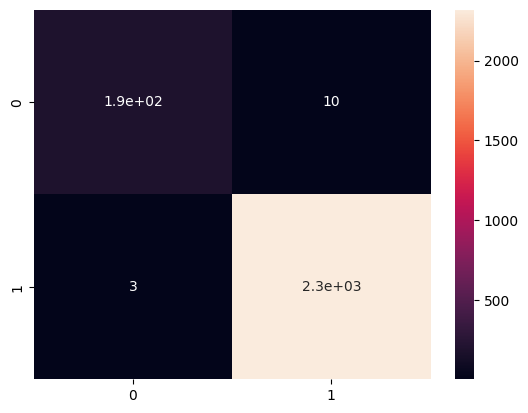

In [ ]:
ab = confusion_matrix(y_train,y_predict_train )
sns.heatmap(ab,annot=True)

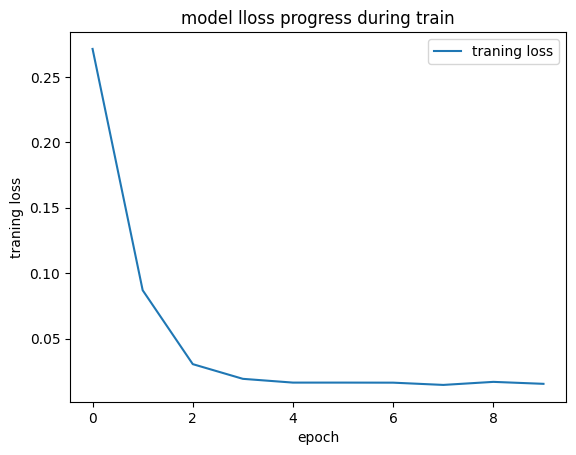

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('model lloss progress during train')
plt.xlabel('epoch')
plt.ylabel('traning loss')
plt.legend(['traning loss'])

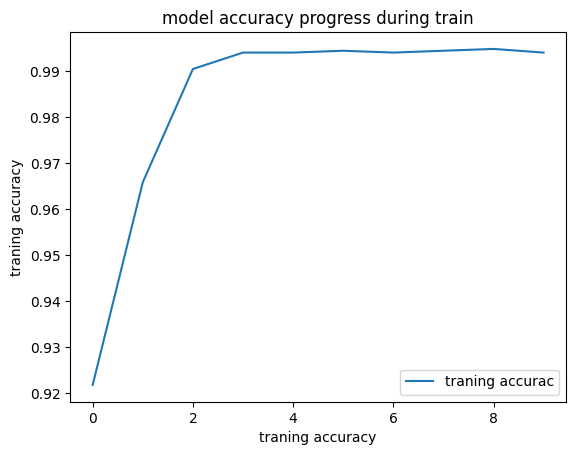

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('model accuracy progress during train')
plt.xlabel('traning accuracy')
plt.ylabel('traning accuracy')
plt.legend(['traning accurac'])